<h1> TASK 3 (NLP)


In [1]:
#Importing packages
import pandas as pd 
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Reading Data And Basic Analysis

In [2]:
df= pd.read_csv(r"F:\vaishnav srivastava\Tableau projects\Flipkart\flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv")

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
df['product_category_tree']=df['product_category_tree'].str.replace('[', '').str.replace('"', '')
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


<h3> Seprating Main Categories

In [5]:
#Splitting category column 
df['main_category']=df['product_category_tree'].str.split('>>', expand=True)[0]
df['main_category'].value_counts()

Clothing                                                6198
Jewellery                                               3531
Footwear                                                1227
Mobiles & Accessories                                   1099
Automotive                                              1012
                                                        ... 
Kombee Girl's Printed Red, Pink Top & Capri Set]           1
Dolz Slim Fit Fit Women's Brown Jeans]                     1
Oddy RS 1.5 X 2 100 Sheets Self Stick Reposition...]       1
Linzina Fashions LIN-HOSS-1.5 Faucet Set]                  1
Sumo Baby Walker (Red)]                                    1
Name: main_category, Length: 266, dtype: int64

In [6]:
'''
    We have 266 different main categories but many of these are just names of the product
    So filtering out them on the basis of their count
    
    '''

value_count=df['main_category'].value_counts()
to_remove=value_count[value_count<=10].index
df=df[df.main_category.isin(to_remove)==False]
df.main_category.value_counts()

Clothing                              6198
Jewellery                             3531
Footwear                              1227
Mobiles & Accessories                 1099
Automotive                            1012
Home Decor & Festive Needs             929
Beauty and Personal Care               710
Home Furnishing                        700
Kitchen & Dining                       647
Computers                              578
Watches                                530
Baby Care                              483
Tools & Hardware                       391
Toys & School Supplies                 330
Pens & Stationery                      313
Bags, Wallets & Belts                  265
Furniture                              180
Sports & Fitness                       166
Cameras & Accessories                   82
Home Improvement                        81
Health & Personal Care Appliances       43
Sunglasses                              35
Gaming                                  35
Pet Supplie

<h3> Creating function to seprate sub categories

In [7]:
def second_category(value):
    try:
        return value.split('>>')[1]
    except IndexError:
        return 'None'
def third_category(value):
    try:
        return value.split('>>')[2]
    except IndexError:
        return 'None'

In [8]:
#applying function
df['sub_category']=df['product_category_tree'].apply(second_category)
df['sub-sub_category']=df['product_category_tree'].apply(third_category)
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category,sub_category,sub-sub_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care


<h3> Deleting Extra Columns

In [9]:
df.product_rating.value_counts()

No rating available    17819
5                        617
4                        245
1                        171
3                        166
2                         78
4.5                       65
3.7                       50
4.2                       47
4.3                       45
3.5                       45
3.6                       25
4.1                       24
2.5                       23
4.7                       23
3.8                       22
4.8                       21
3.2                       20
3.3                       17
4.4                       16
3.9                       15
3.4                       13
2.3                       12
2.8                       11
2.7                       10
4.6                        9
2.2                        7
3.1                        7
2.9                        5
2.4                        5
1.3                        4
1.5                        4
4.9                        4
2.6                        3
1.7           

In [10]:
'''Rating column has many values with no rating availabale'''


df.drop(['uniq_id', 'product_url', 'pid', 'image', 'product_rating', 'overall_rating', 'product_specifications'], axis=1)

,crawl_timestamp,product_name,product_category_tree,retail_price,discounted_price,is_FK_Advantage_product,description,brand,main_category,sub_category,sub-sub_category
0,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",999.0,379.0,False,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
1,2016-03-25 22:59:23 +0000,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,32157.0,22646.0,False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture,Living Room Furniture,Sofa Beds & Futons
2,2016-03-25 22:59:23 +0000,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,999.0,499.0,False,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear,Women's Footwear,Ballerinas
3,2016-03-25 22:59:23 +0000,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",699.0,267.0,False,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear"
4,2016-03-25 22:59:23 +0000,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,220.0,210.0,False,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies,Grooming,Skin & Coat Care
...,...,...,...,...,...,...,...,...,...,...,...
19995,2015-12-01 10:15:43 +0000,WallDesign Small Vinyl Sticker,Baby Care >> Baby & Kids Gifts >> Stickers >> ...,1500.0,730.0,False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign,Baby Care,Baby & Kids Gifts,Stickers
19996,2015-12-01 10:15:43 +0000,Wallmantra Large Vinyl Stickers Sticker,Baby Care >> Baby & Kids Gifts >> Stickers >> ...,1429.0,1143.0,False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,Baby Care,Baby & Kids Gifts,Stickers
19997,2015-12-01 10:15:43 +0000,Elite Collection Medium Acrylic Sticker,Baby Care >> Baby & Kids Gifts >> Stickers >> ...,1299.0,999.0,False,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care,Baby & Kids Gifts,Stickers
19998,2015-12-01 10:15:43 +0000,Elite Collection Medium Acrylic Sticker,Baby Care >> Baby & Kids Gifts >> Stickers >> ...,1499.0,1199.0,False,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection,Baby Care,Baby & Kids Gifts,Stickers


<h1> EDA

Discounted sales by category

In [11]:
df['discounted_percentage']=round((df['retail_price']-df['discounted_price'])/df['retail_price']*100,2)
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category,sub_category,sub-sub_category,discounted_percentage
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",62.06
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons,29.58
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas,50.05
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",61.80
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care,4.55


Creating new data frame

In [12]:
main_category_discount_percentage=df.groupby('main_category').agg({'discounted_percentage':[np.mean],'main_category':['count']})
main_category_discount_percentage

,discounted_percentage,main_category
,mean,count
main_category,,
Automotive,54.651287,1012
Baby Care,34.717006,483
"Bags, Wallets & Belts",48.272500,265
Beauty and Personal Care,19.829986,710
Cameras & Accessories,19.440833,82
Clothing,45.070723,6198
Computers,43.467400,578
Footwear,36.268612,1227


In [13]:
#combining column
main_category_discount_percentage.columns=['_' .join(column) for column in main_category_discount_percentage.columns]
main_category_discount_percentage

,discounted_percentage_mean,main_category_count
main_category,,
Automotive,54.651287,1012
Baby Care,34.717006,483
"Bags, Wallets & Belts",48.272500,265
Beauty and Personal Care,19.829986,710
Cameras & Accessories,19.440833,82
Clothing,45.070723,6198
Computers,43.467400,578
Footwear,36.268612,1227
Furniture,29.722000,180


In [14]:
main_category_discount_percentage.sort_values(by='main_category_count',ascending=False)

,discounted_percentage_mean,main_category_count
main_category,,
Clothing,45.070723,6198
Jewellery,40.889929,3531
Footwear,36.268612,1227
Mobiles & Accessories,50.994640,1099
Automotive,54.651287,1012
Home Decor & Festive Needs,36.649482,929
Beauty and Personal Care,19.829986,710
Home Furnishing,37.218529,700
Kitchen & Dining,43.771767,647


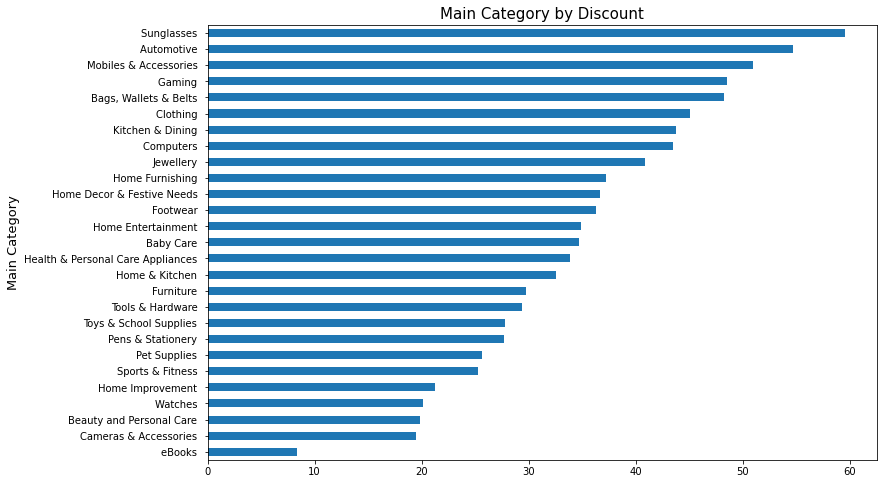

In [15]:
plt.figure(figsize=(12,8))
main_category_discount_percentage['discounted_percentage_mean'].sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category by Discount', fontsize=15)
plt.ylabel('Main Category', fontsize=13)
plt.show()

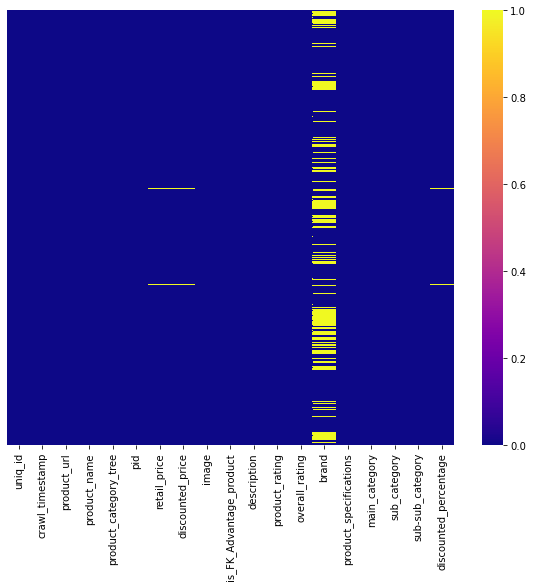

In [16]:
## The Brand column has lots of null values.

plt.figure(figsize =(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cmap='plasma',cbar=True)
plt.show()

<h3> Seprating Year and Month

In [17]:
#converting to datetime object
df.crawl_timestamp=pd.to_datetime(df.crawl_timestamp)

In [18]:
df['Year']=df.crawl_timestamp.apply(lambda x: x.year)
df['Month']=df.crawl_timestamp.apply(lambda x: x.month)

In [19]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,main_category,sub_category,sub-sub_category,discounted_percentage,Year,Month
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",62.06,2016,3
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,Furniture >> Living Room Furniture >> Sofa Bed...,SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture,Living Room Furniture,Sofa Beds & Futons,29.58,2016,3
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear >> Women's Footwear >> Ballerinas >> ...,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear,Women's Footwear,Ballerinas,50.05,2016,3
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"Clothing >> Women's Clothing >> Lingerie, Slee...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",61.80,2016,3
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,Pet Supplies >> Grooming >> Skin & Coat Care >...,PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies,Grooming,Skin & Coat Care,4.55,2016,3


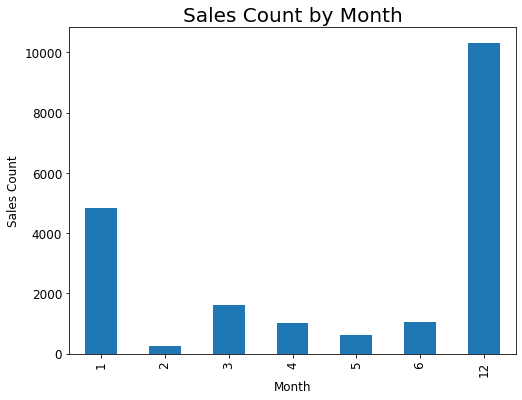

Month
1      4844
2       245
3      1604
4       998
5       613
6      1035
12    10314
Name: Month, dtype: int64


In [20]:
#December has most number of sales
plt.figure(figsize=(8,6))
df.groupby('Month')['Month'].count().plot(kind='bar')
plt.title('Sales Count by Month',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()
print(df.groupby('Month')['Month'].count())

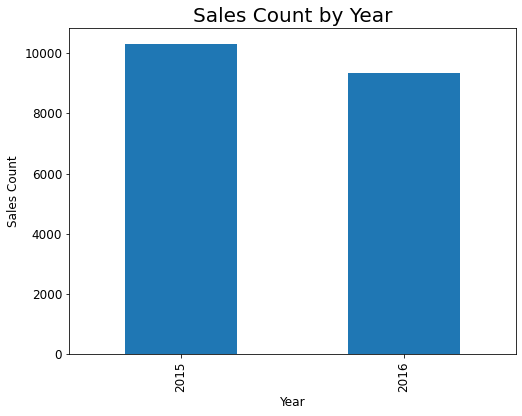

Year
2015    10314
2016     9339
Name: Year, dtype: int64


In [21]:
#2015 has slightly more number of sales
plt.figure(figsize=(8,6))
df.groupby('Year')['Year'].count().plot(kind='bar')
plt.title('Sales Count by Year',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.ylabel('Sales Count',fontsize=12)
plt.show()
print(df.groupby('Year')['Year'].count())

<h3> Sales with different categories

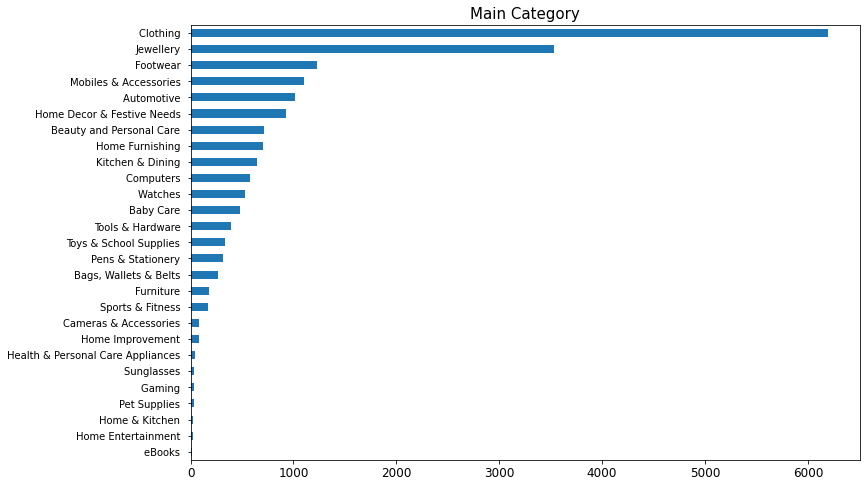

In [22]:
#Clothing category has most number of sales
plt.figure(figsize=(12,8))
df['main_category'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Main Category',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=12)
plt.show()

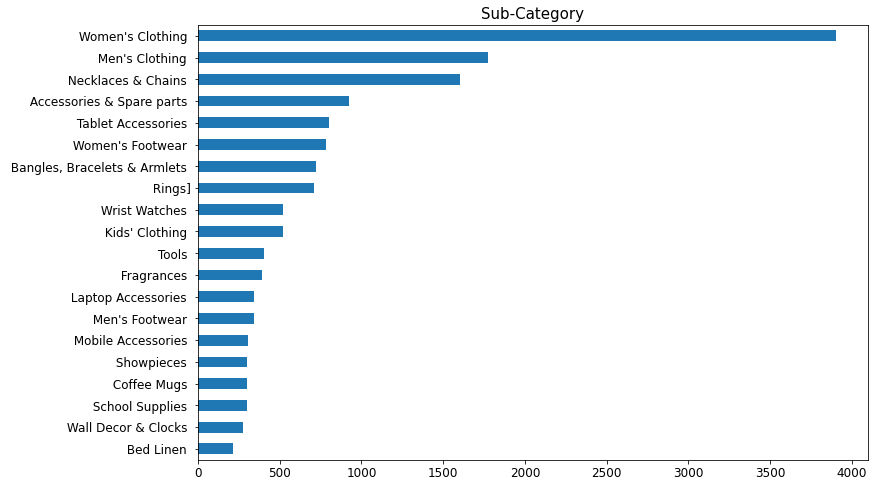

Top Ten Sub-Categories by Sales.

 Women's Clothing                 3901
 Men's Clothing                   1773
 Necklaces & Chains               1606
 Accessories & Spare parts         925
 Tablet Accessories                801
 Women's Footwear                  781
 Bangles, Bracelets & Armlets      724
 Rings]                            710
 Wrist Watches                     523
 Kids' Clothing                    520
Name: sub_category, dtype: int64


In [23]:
plt.figure(figsize=(12,8))
df['sub_category'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Sub-Category',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Ten Sub-Categories by Sales.\n')
print(df['sub_category'].value_counts()[:10])

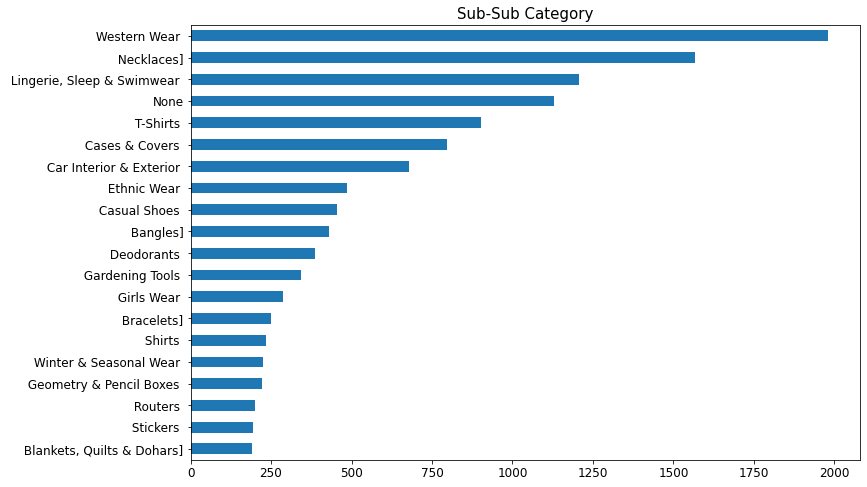

Top Sub-Sub Categories by Sales.

 Western Wear                   1981
 Necklaces]                     1567
 Lingerie, Sleep & Swimwear     1208
None                            1128
 T-Shirts                        903
 Cases & Covers                  796
 Car Interior & Exterior         677
 Ethnic Wear                     485
 Casual Shoes                    454
 Bangles]                        430
Name: sub-sub_category, dtype: int64


In [24]:
plt.figure(figsize=(12,8))
df['sub-sub_category'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh')
plt.title('Sub-Sub Category',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
print('Top Sub-Sub Categories by Sales.\n')
print(df['sub-sub_category'].value_counts()[:10])

In [25]:
#Most Expensive item
df[df['discounted_price']==df['discounted_price'].max()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,main_category,sub_category,sub-sub_category,discounted_percentage,Year,Month
116,329c5f4d7aced63e1ce3e88f41d5e7e6,2015-12-04 07:25:36+00:00,http://www.flipkart.com/breitling-ab011010-bb0...,Breitling AB011010/BB08 131S Chronomat 44 Anal...,Watches >> Wrist Watches >> Breitling Wrist Wa...,WATE9DX9E4YSRJSY,571230.0,571230.0,"[""http://img5a.flixcart.com/image/watch/j/s/y/...",False,...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches,Wrist Watches,Breitling Wrist Watches],0.0,2015,12


In [26]:
#Most cheap item
df[df['discounted_price']==df['discounted_price'].min()]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,main_category,sub_category,sub-sub_category,discounted_percentage,Year,Month
10554,aa68675f50a0551b8dadb954017a50a1,2016-04-15 20:20:45+00:00,http://www.flipkart.com/geol-wooden-wet-dry-br...,Geol Wooden Wet and Dry Broom,Kitchen & Dining >> Housekeeping & Laundry >> ...,BMBEHPAGGDSSYMUZ,35.0,35.0,"[""http://img5a.flixcart.com/image/broom-brush/...",False,...,No rating available,No rating available,Geol,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Kitchen & Dining,Housekeeping & Laundry,Home Cleaning,0.0,2016,4


<h3> Cleaning Data 

In [27]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    

In [28]:
#applying function to description column by converting to string
df['description'] = df['description'].astype(str)

In [29]:
df['description'] = df['description'].apply(clean_text)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19653 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  19653 non-null  object             
 1   crawl_timestamp          19653 non-null  datetime64[ns, UTC]
 2   product_url              19653 non-null  object             
 3   product_name             19653 non-null  object             
 4   product_category_tree    19653 non-null  object             
 5   pid                      19653 non-null  object             
 6   retail_price             19578 non-null  float64            
 7   discounted_price         19578 non-null  float64            
 8   image                    19650 non-null  object             
 9   is_FK_Advantage_product  19653 non-null  bool               
 10  description              19653 non-null  object             
 11  product_rating           196

<h1>Model Training

In [31]:
# Creating X, y Variables
X, y = df['description'], df['main_category']
# Setting up train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Pipeline and Grid Search Setup

In [32]:
#CountVectorizer Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB())])

#TfidVectorizer Pipeline
tvc_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('clf1', MultinomialNB())
])
## Hyperparameter Tuning
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'clf__alpha': [1, 1e-1, 1e-2]}

tf_params = {
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tvec__stop_words': [None, 'english'],
 'clf1__alpha': [1, 1e-1, 1e-2]
 
}

In [33]:
# Setting up GridSearch for CountVectorizer
clf = GridSearchCV(text_clf, tuned_parameters, cv=5, verbose =1, n_jobs = -1)
clf.fit(X_train, y_train)
# Setting up GridSearch for TfidVectorizer
clf2 = GridSearchCV(tvc_pipe, tf_params, cv=5, verbose =1, n_jobs = -1)
clf2.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   13.3s finished


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   24.2s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('clf1', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf1__alpha': [1, 0.1, 0.01],
                         'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
                         'tvec__stop_words': [None, 'english']},
             verbose=1)

In [34]:
print(clf.score(X_test, y_test))# Scoring Training data on CountVectorizer
print(clf.score(X_train, y_train))# Scoring Testing data on CountVectorizer
print(clf2.score(X_test, y_test))# Scoring Training data on TFIDFVectorizer
print(clf2.score(X_train, y_train))# Scoring Testing data on TFIDFVectorizer


0.9658119658119658
0.994572223353009
0.9743589743589743
0.9981002781735532


In [35]:
#Classification report of CountVEctorizer
predicted_clf=clf.predict(X_test)
print(classification_report(y_test,predicted_clf))

                                    precision    recall  f1-score   support

                       Automotive        0.98      0.97      0.98       252
                        Baby Care        0.84      0.88      0.86       116
            Bags, Wallets & Belts        0.96      0.75      0.84        71
         Beauty and Personal Care        0.86      0.96      0.91       184
            Cameras & Accessories        0.85      1.00      0.92        17
                         Clothing        0.99      0.99      0.99      1565
                        Computers        0.96      0.87      0.91       158
                         Footwear        0.99      1.00      0.99       301
                        Furniture        0.97      1.00      0.99        38
                           Gaming        0.60      0.75      0.67         8
Health & Personal Care Appliances        1.00      0.92      0.96        12
                   Home & Kitchen        0.80      0.80      0.80         5
       Home

In [36]:
#Classification report of TfidVectorizer
predicted_clf2=clf2.predict(X_test)
print(classification_report(y_test,predicted_clf2))

                                    precision    recall  f1-score   support

                       Automotive        0.98      0.99      0.98       252
                        Baby Care        0.93      0.84      0.88       116
            Bags, Wallets & Belts        0.92      0.80      0.86        71
         Beauty and Personal Care        0.94      0.96      0.95       184
            Cameras & Accessories        1.00      1.00      1.00        17
                         Clothing        0.99      1.00      0.99      1565
                        Computers        0.93      0.95      0.94       158
                         Footwear        0.99      1.00      0.99       301
                        Furniture        0.97      1.00      0.99        38
                           Gaming        0.67      0.75      0.71         8
Health & Personal Care Appliances        1.00      0.92      0.96        12
                   Home & Kitchen        1.00      0.80      0.89         5
       Home